# Feature engineering

**In this notebook, I will perform the following tasks**

* Drop any unnecessary columns
* Data imputation
* Export final dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from feature_engine.imputation import RandomSampleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

In [ ]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0


Lets visualize how many data points are we missing

In [3]:
missing_data = dataset.isna().sum().sort_values()
missing_data

RID                            0
Gender                         0
Ageatscreening                 0
Diagnosis                      0
HipsSumAveragebaseline         1
MMSE0m                         3
ERCsASMbaseline                4
HipsSumVariancebaseline        7
HipsVariancebaseline           8
ERCsEntropybaseline            9
ERCsSumAveragebaseline        11
ERCsSumVariancebaseline       13
HipsContrastbaseline          14
ERCsVolumebaseline            14
ERCsVariancebaseline          14
HipsClusterShadebaseline      18
ERCsContrastbaseline          18
HipposcampusVolumebaseline    19
HipsCorelationbaseline        20
HipsEntropybaseline           23
HipsASMbaseline               25
ERCsCorelationbaseline        28
ERCsClusterShadebaseline      34
ERCs_thicknessbaseline        37
dtype: int64

## Drop columns

We do miss quite a few. For starters, lets remove RID, Gender and Ageatscreening since these variables contribute little to none - as previously seen in our correlation matrix

In [5]:
dataset.drop(columns=["RID", "Gender", "Ageatscreening"], axis=1, inplace=True)
len(dataset.columns)

21

Perfect. Now lets move to imputing the dataset

## Data imputation

Random sampling imputation is in principle similar to mean, median, and mode imputation in that it considers that missing values should look like those already existing in the distribution.

Random sampling consists of taking random observations from the pool of available data and using them to replace the NA. In random sample imputation, we take as many random observations as missing values exist in the variable.

In both numerical and categorical variables, the distribution of the variable is preserved by sampling observations at random to replace missing data. 

**Assumptions**

Random sample imputation assumes that the data is missing completely at random. In this scenario, it makes sense to substitute the missing values with values extracted at random from the original distribution. 

From a probabilistic point of view, values that are more frequent, like the mean or the median or the most frequent category, will be selected more often (because there are more of them to select from), but less frequent values will be selected as well. Thus, the distribution of the variables is preserved. 

In essence, we replace a population of missing values with a population of values with the same distribution of the original variable.

### Split the data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop("Diagnosis", axis=1),  
    dataset["Diagnosis"],  
    test_size=0.3,  
    random_state=42,  
)

X_train_copy = X_train.copy()
X_test_copy = X_train.copy()

X_train.shape, X_test.shape

((425, 20), (183, 20))

In [7]:
imputer  = RandomSampleImputer(random_state=42)
imputer.fit(X_train)

imputer.variables_

['MMSE0m',
 'HipsASMbaseline',
 'HipsContrastbaseline',
 'HipsCorelationbaseline',
 'HipsVariancebaseline',
 'HipsSumAveragebaseline',
 'HipsSumVariancebaseline',
 'HipsEntropybaseline',
 'HipsClusterShadebaseline',
 'ERCsASMbaseline',
 'ERCsContrastbaseline',
 'ERCsCorelationbaseline',
 'ERCsVariancebaseline',
 'ERCsSumAveragebaseline',
 'ERCsSumVariancebaseline',
 'ERCsEntropybaseline',
 'ERCsClusterShadebaseline',
 'ERCs_thicknessbaseline',
 'ERCsVolumebaseline',
 'HipposcampusVolumebaseline']

Great. lets see if our imputation method worked

In [8]:
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

X_train_t[imputer.variables_].isnull().sum()

MMSE0m                        0
HipsASMbaseline               0
HipsContrastbaseline          0
HipsCorelationbaseline        0
HipsVariancebaseline          0
HipsSumAveragebaseline        0
HipsSumVariancebaseline       0
HipsEntropybaseline           0
HipsClusterShadebaseline      0
ERCsASMbaseline               0
ERCsContrastbaseline          0
ERCsCorelationbaseline        0
ERCsVariancebaseline          0
ERCsSumAveragebaseline        0
ERCsSumVariancebaseline       0
ERCsEntropybaseline           0
ERCsClusterShadebaseline      0
ERCs_thicknessbaseline        0
ERCsVolumebaseline            0
HipposcampusVolumebaseline    0
dtype: int64

In [9]:
X_test_t[imputer.variables_].isnull().sum()

MMSE0m                        0
HipsASMbaseline               0
HipsContrastbaseline          0
HipsCorelationbaseline        0
HipsVariancebaseline          0
HipsSumAveragebaseline        0
HipsSumVariancebaseline       0
HipsEntropybaseline           0
HipsClusterShadebaseline      0
ERCsASMbaseline               0
ERCsContrastbaseline          0
ERCsCorelationbaseline        0
ERCsVariancebaseline          0
ERCsSumAveragebaseline        0
ERCsSumVariancebaseline       0
ERCsEntropybaseline           0
ERCsClusterShadebaseline      0
ERCs_thicknessbaseline        0
ERCsVolumebaseline            0
HipposcampusVolumebaseline    0
dtype: int64

Lets have a look as to how our imputed dataset is currently affected compared to the original one. We assume that the normal distribution should have a minimal effect.

#### Comparison of Imputed and Original X_train Dataset

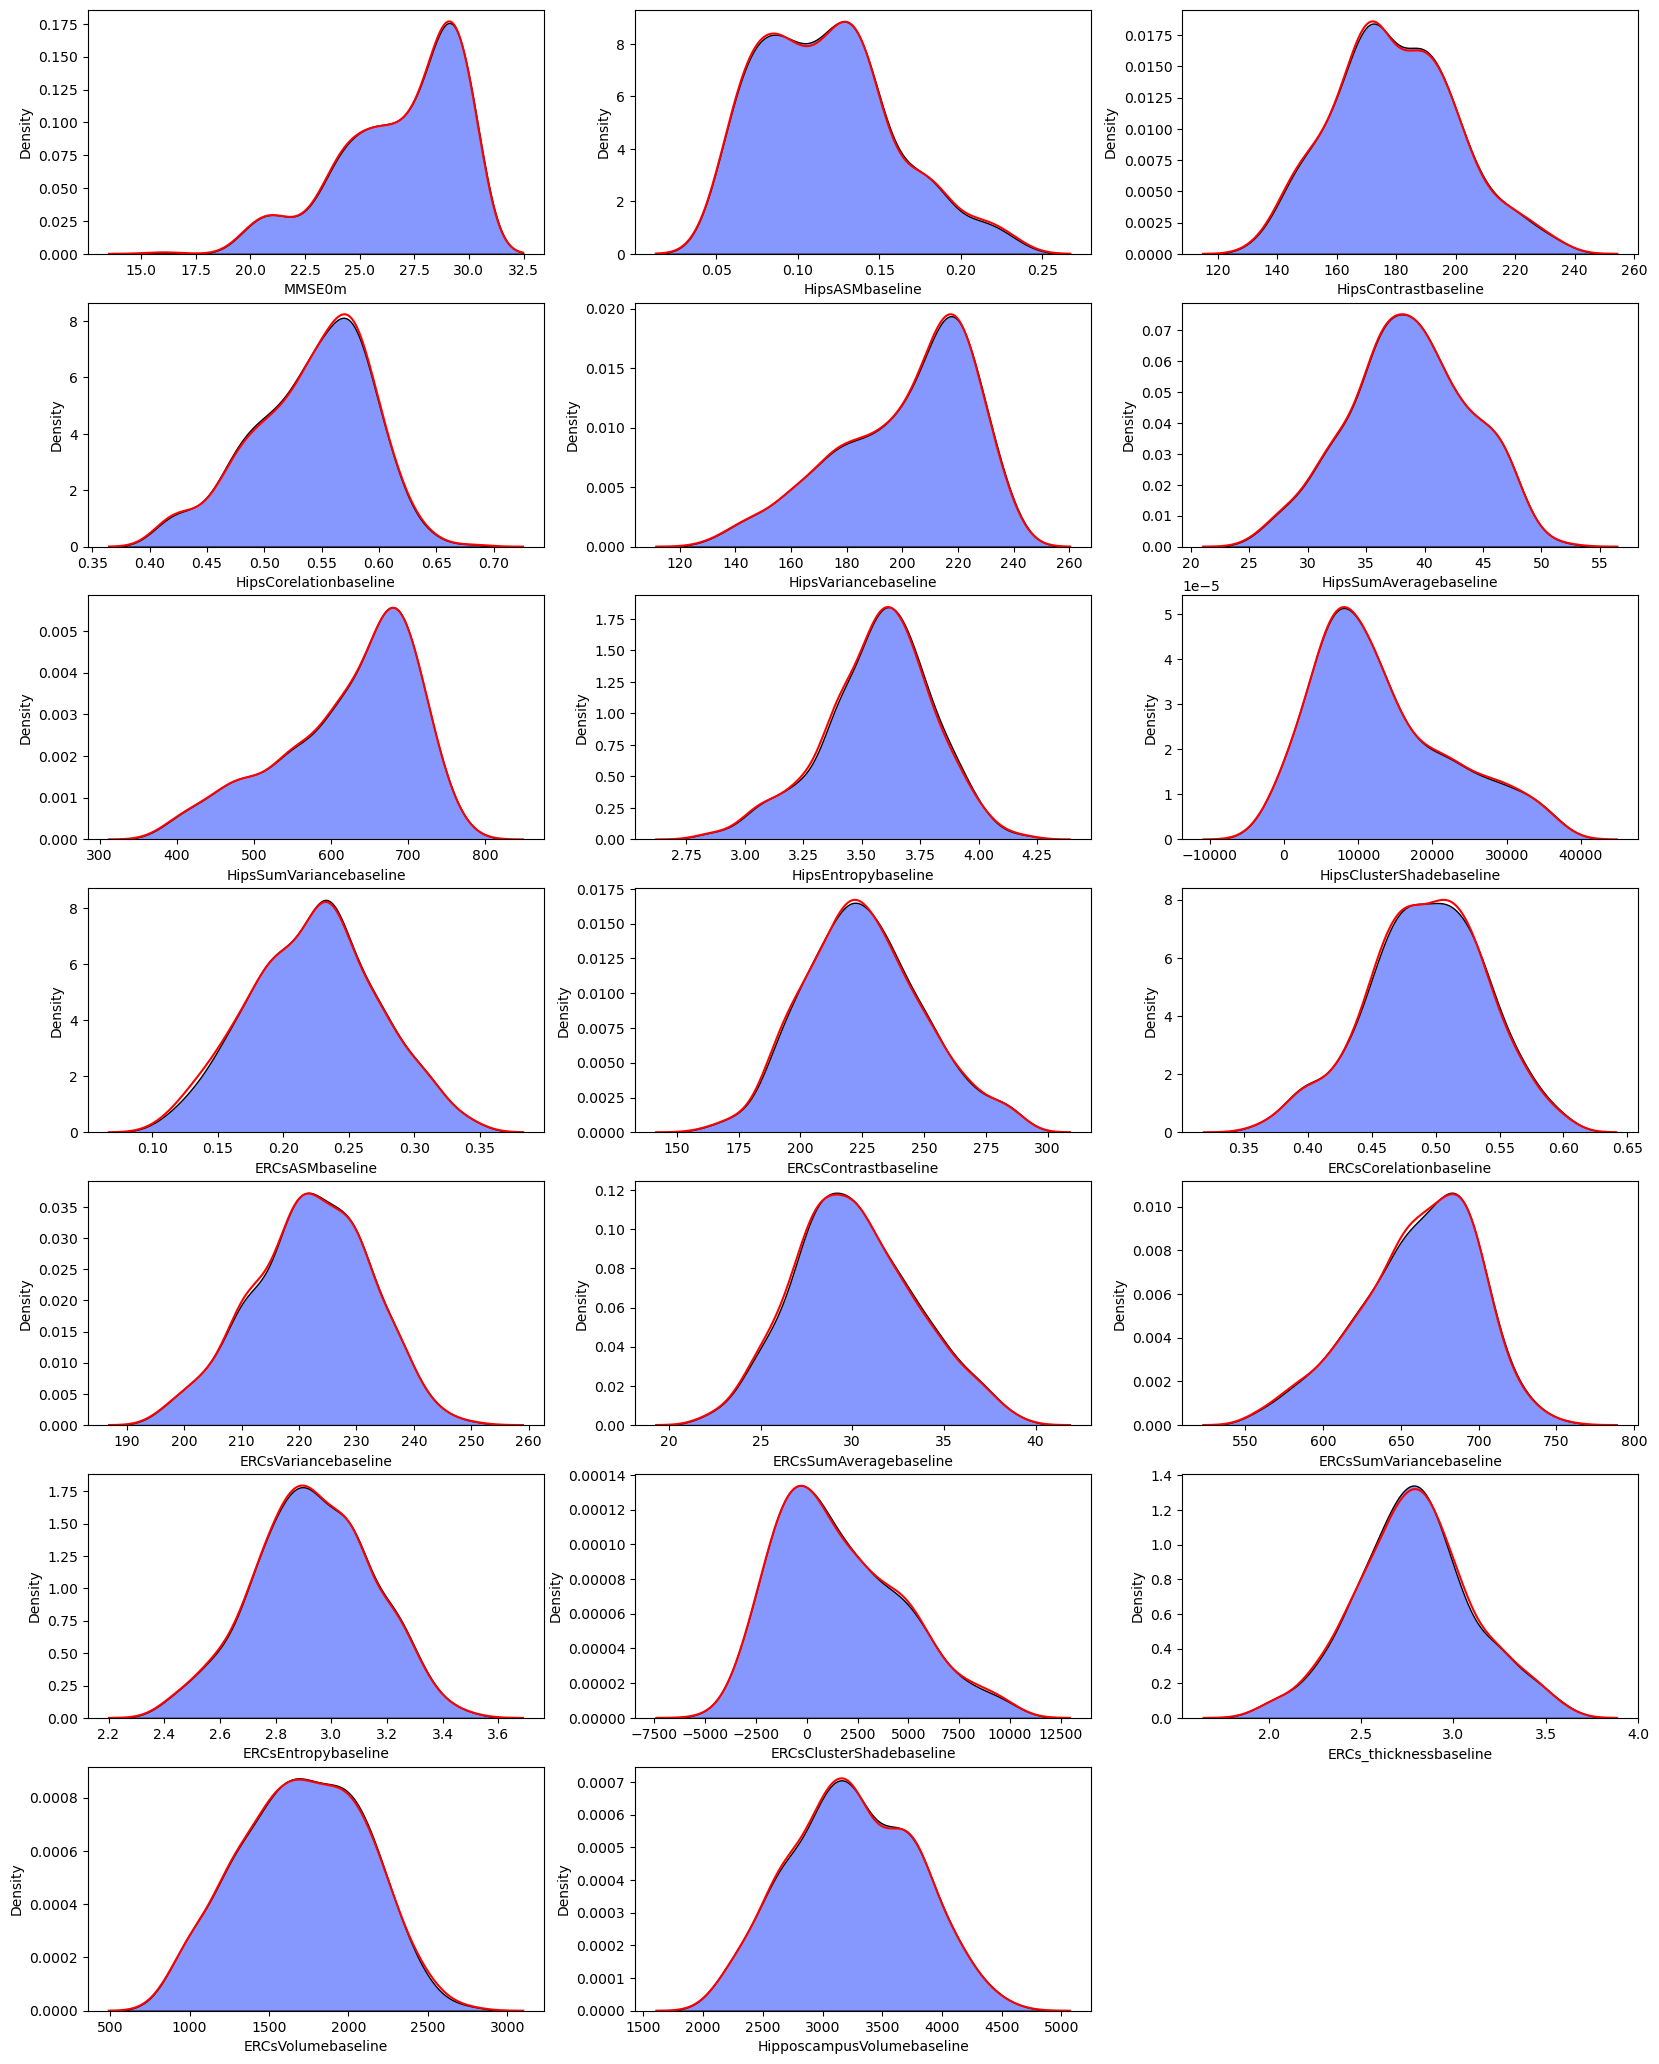

In [10]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_copy.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_copy[X_train_copy.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_t[X_train_t.columns[i]], color= "red")

It appears that we have succesfuly preserved our original variance/normal distribution using out imputation method on our training set. How about we check the difference in our testing set?

#### Comparison of Imputed and Original X_test Dataset

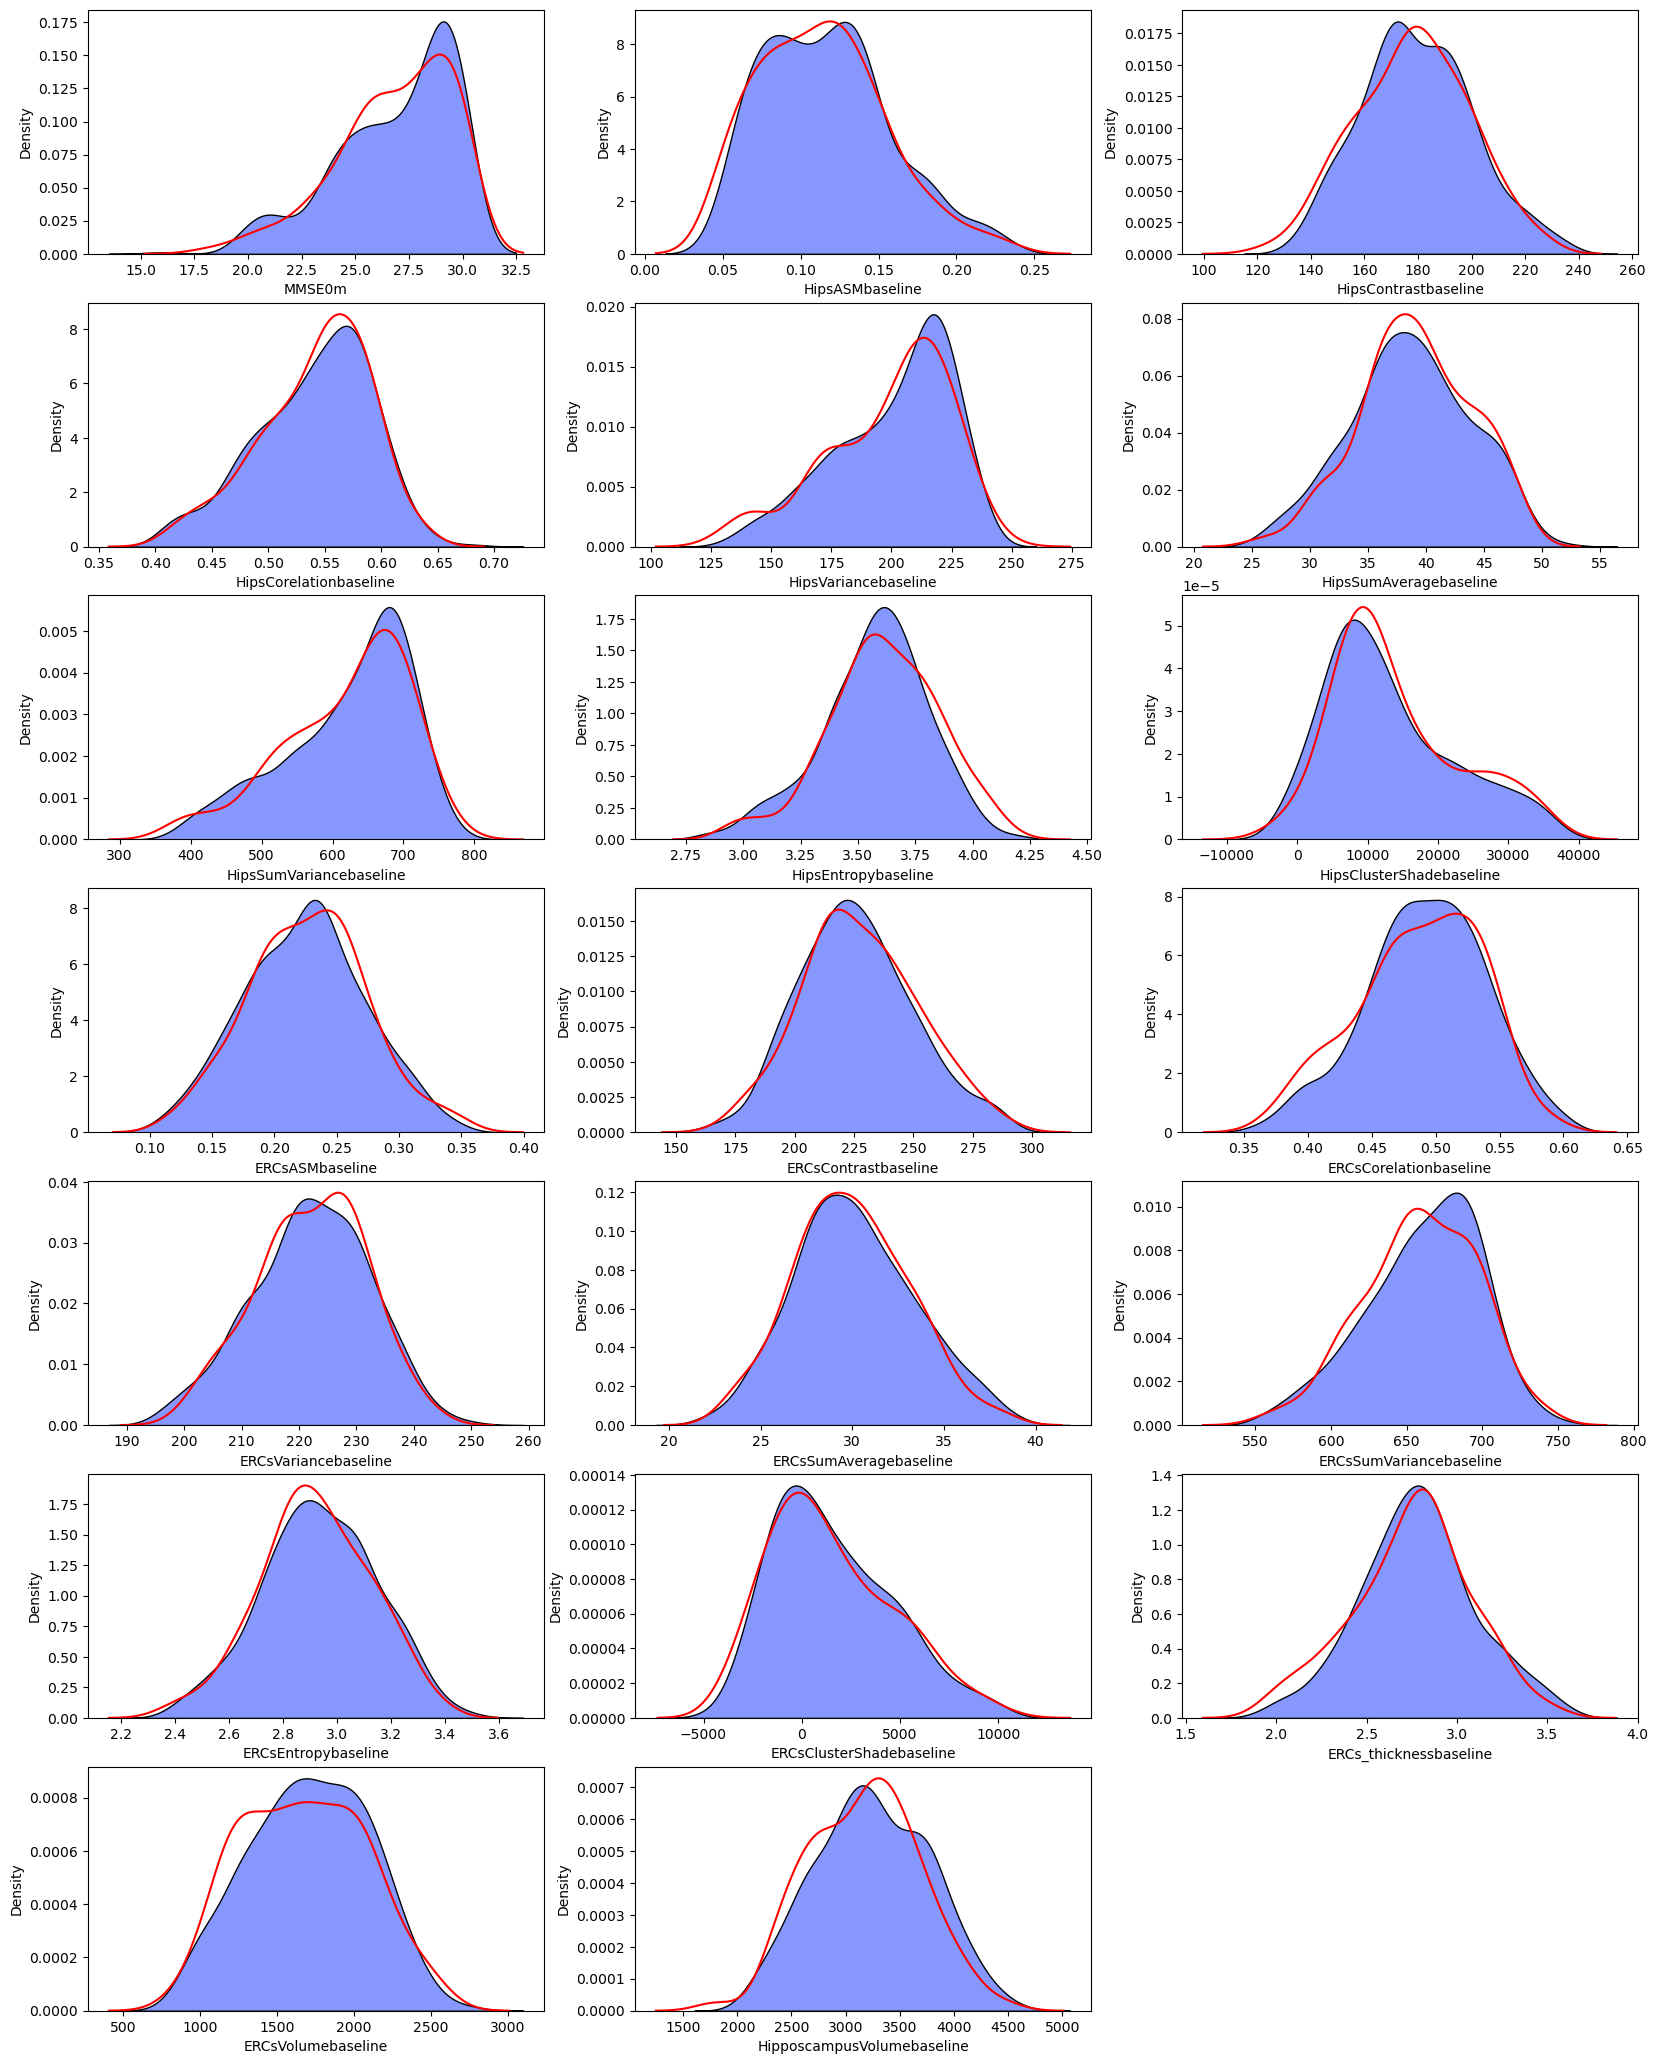

In [11]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_test_copy.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_copy[X_test_copy.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_t[X_test_t.columns[i]], color= "red")

It appears that in the testing set, the data imputation method has been affected a lot. How about we check the normal distribution of both the transformed train and test set?

#### Comparing Imputed Test and Train Datasets

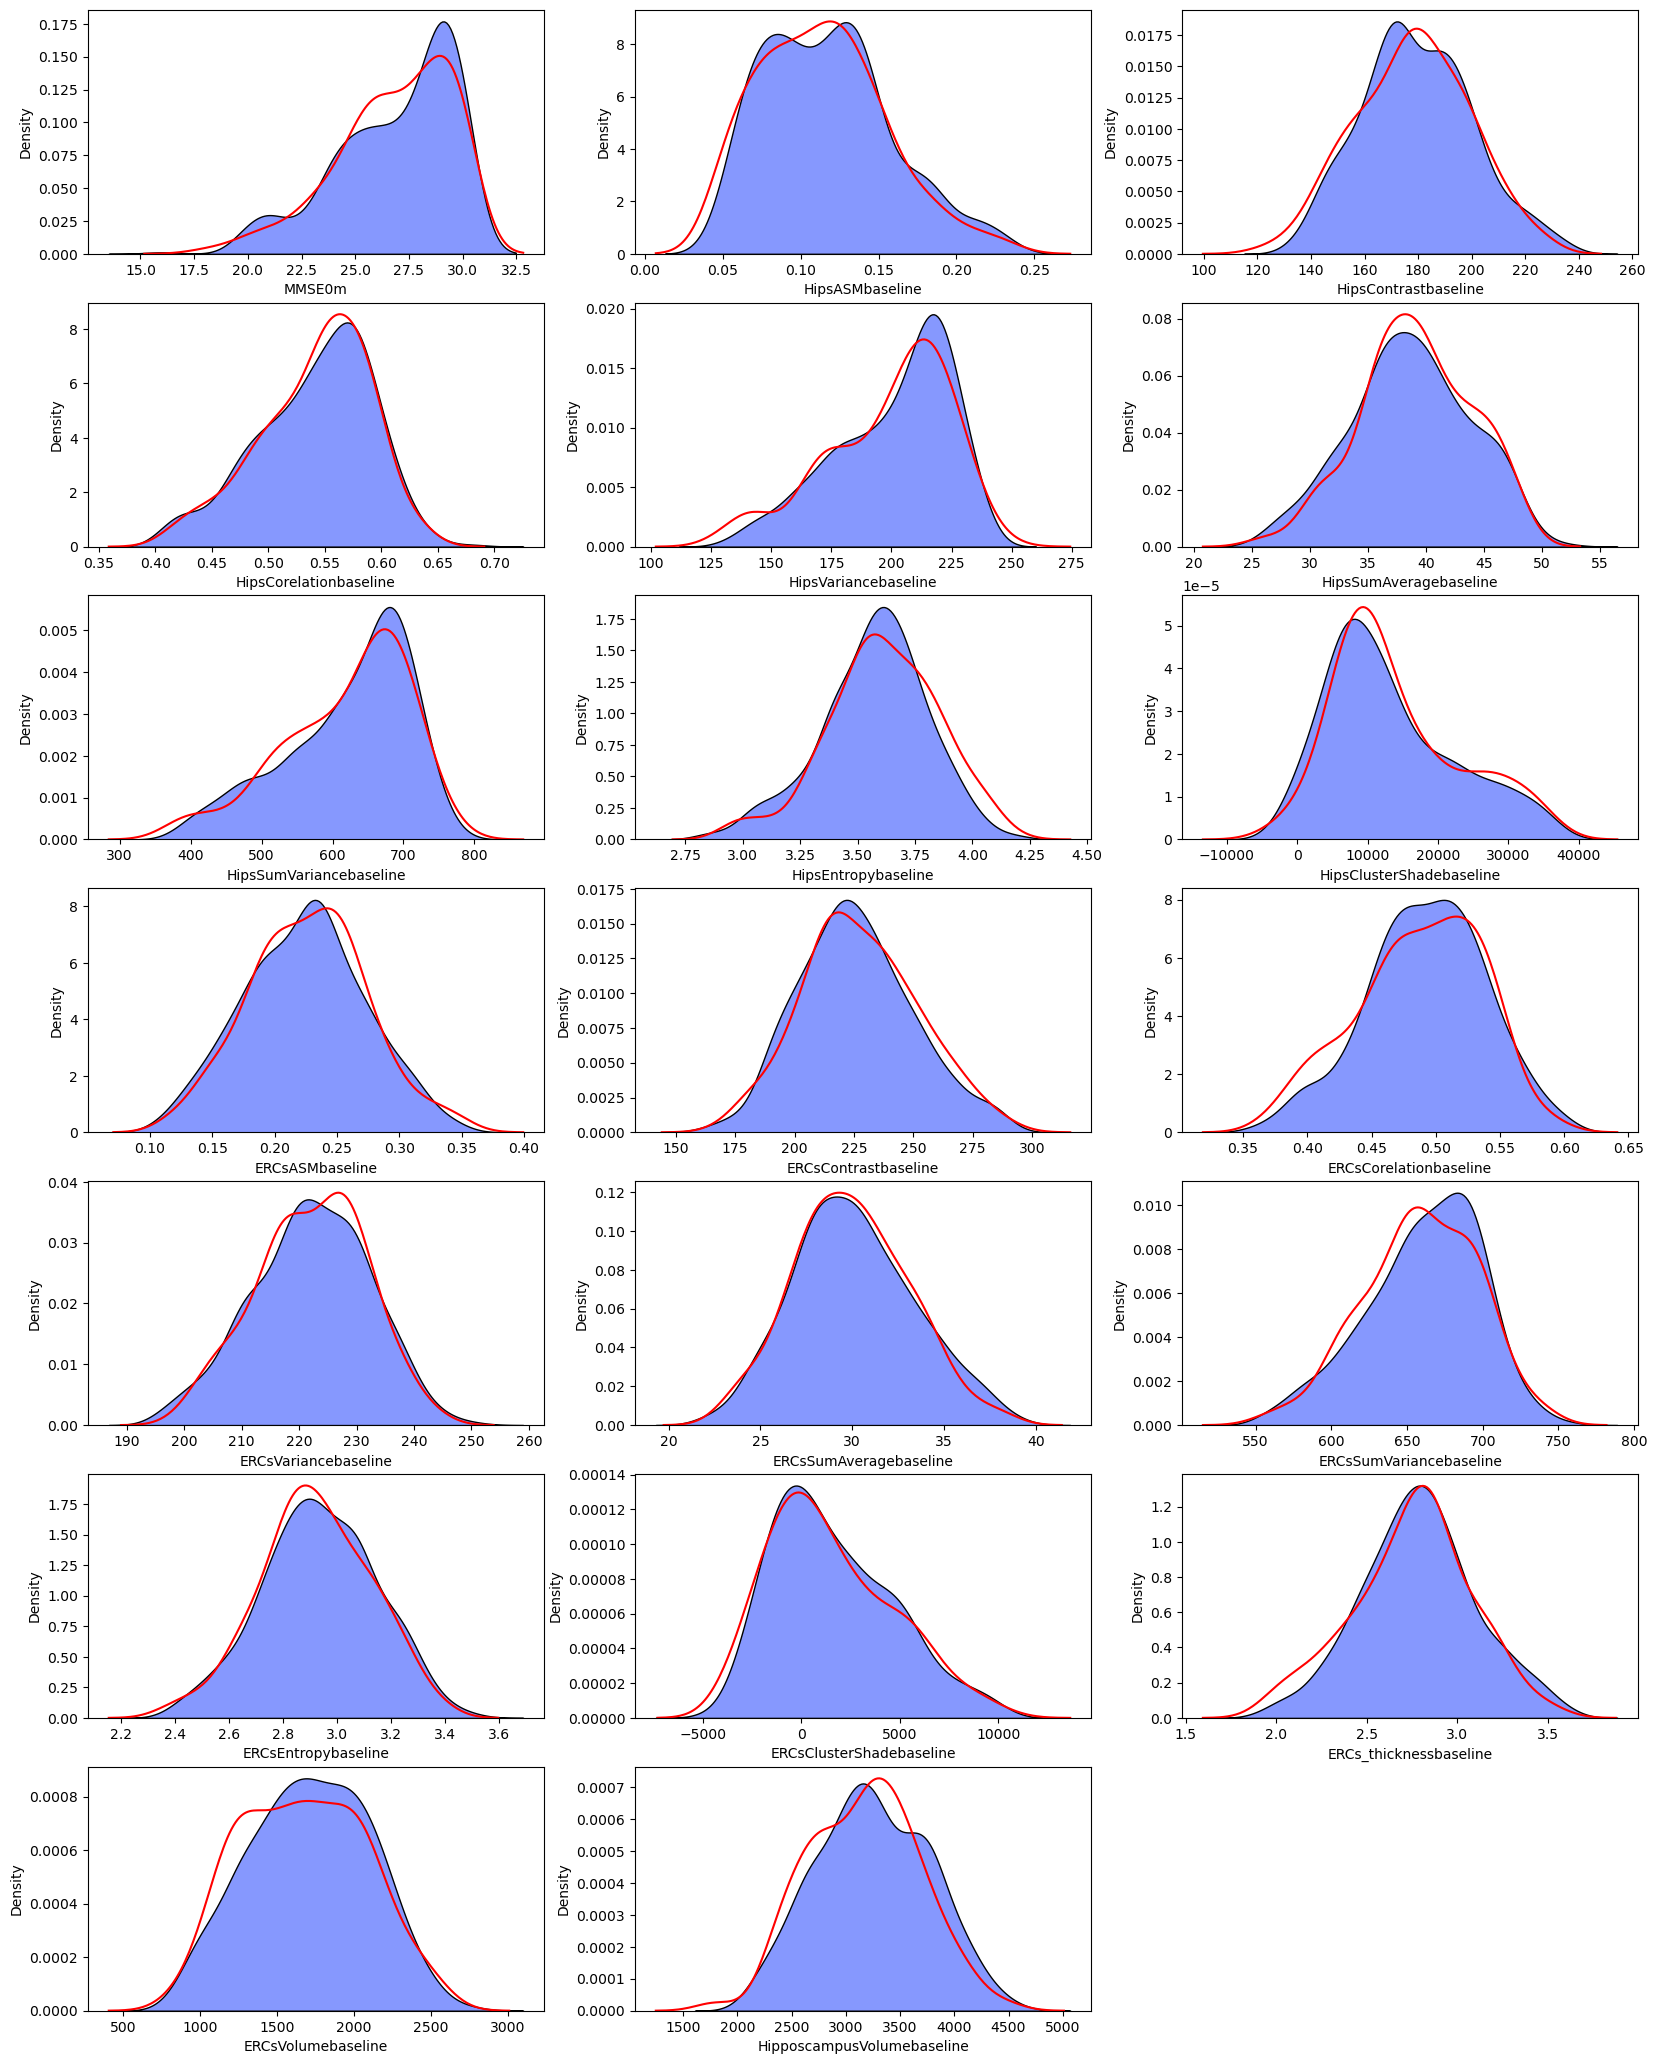

In [12]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_t.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_t[X_train_t.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_t[X_test_t.columns[i]], color= "red")

Although we have not captured a perfect normal distribution after imputing, we will have to eventually choose a different imputation method? Like KNN - **to be implemeneted on the third iteration**

**Note**

I personally think that we dont have to apply variable transformation, since we have observed in our EDA notebook and above that most of our data is followig a normal distribution

# Group Seperation

In [13]:
trained_combined = pd.concat([X_train_t, y_train], axis=1)
test_combined = pd.concat([X_test_t, y_test], axis=1)

trained_combined.shape, test_combined.shape

((425, 21), (183, 21))

In [14]:
trained_combined.head()

,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,HipsSumVariancebaseline,HipsEntropybaseline,HipsClusterShadebaseline,ERCsASMbaseline,...,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline,Diagnosis
108,24.0,0.09,170.02,0.45,213.60,42.73,615.39,3.60,16693.64,0.22,...,0.43,224.58,29.39,640.73,2.96,57.73,2.53,1278.0,2448.0,1
274,26.0,0.08,165.75,0.51,179.00,43.23,550.26,3.59,22784.56,0.27,...,0.51,217.43,28.37,652.46,2.72,2072.42,2.61,1027.0,2349.0,1
607,20.0,0.15,147.66,0.57,180.78,31.82,575.46,3.49,7233.57,0.20,...,0.39,233.07,29.95,644.68,2.95,-467.36,2.45,1819.0,3631.0,3
487,29.0,0.12,184.28,0.58,215.56,37.63,677.96,3.55,10587.17,0.23,...,0.52,213.05,29.07,654.06,2.98,1421.62,3.48,2002.0,3400.0,1
443,28.0,0.14,217.01,0.53,228.40,29.23,696.61,2.83,-507.05,0.24,...,0.53,228.40,29.23,696.61,2.83,-507.05,3.36,1945.0,4210.0,0


In [15]:
test_combined.head()

,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,HipsSumVariancebaseline,HipsEntropybaseline,HipsClusterShadebaseline,ERCsASMbaseline,...,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline,Diagnosis
109,23.0,0.12,173.84,0.54,193.32,37.16,599.45,3.66,9743.04,0.31,...,0.54,199.01,24.39,609.69,2.68,-2053.94,2.73,1668.0,3044.0,3
10,26.0,0.13,159.92,0.59,201.60,38.98,646.47,3.62,12429.32,0.20,...,0.47,229.94,32.11,678.80,3.06,3234.84,2.91,1679.0,4164.0,0
184,28.0,0.21,202.38,0.58,241.74,30.48,764.59,2.98,-888.33,0.24,...,0.51,231.39,28.58,613.64,2.65,-776.61,2.12,2509.0,2256.0,2
77,29.0,0.15,212.80,0.49,216.44,36.75,652.95,3.36,13497.83,0.26,...,0.47,218.36,26.95,598.86,2.63,214.86,2.08,1016.0,2372.0,2
538,28.0,0.14,178.50,0.59,221.47,37.29,707.40,3.46,9528.83,0.23,...,0.51,230.33,30.66,694.10,2.93,1647.73,3.32,2274.0,3309.0,1


In [63]:
# Group one - 0 vs 3
x_train_group_one = trained_combined[trained_combined["Diagnosis"] == 0]
x_train_group_two = trained_combined[trained_combined["Diagnosis"] == 3]

x_test_group_one = test_combined[test_combined["Diagnosis"] == 0]
x_test_group_two = test_combined[test_combined["Diagnosis"] == 3]

x_train_combined_groups_one = pd.concat([x_train_group_one, x_train_group_two], ignore_index = True)
x_train_combined_groups_one = x_train_combined_groups_one.sample(frac=1, random_state=42).reset_index(drop=True)

x_test_combined_groups_one = pd.concat([x_test_group_one, x_test_group_two], ignore_index = True)
x_test_combined_groups_one = x_test_combined_groups_one.sample(frac=1, random_state=42).reset_index(drop=True)

x_test_combined_groups_one["Diagnosis"].unique(), x_test_combined_groups_one["Diagnosis"].unique()

(array([3, 0], dtype=int64), array([3, 0], dtype=int64))

In [47]:
x_train_combined_groups_one.head()

,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,HipsSumVariancebaseline,HipsEntropybaseline,HipsClusterShadebaseline,ERCsASMbaseline,...,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline,Diagnosis
0,28.0,0.05,139.57,0.51,144.26,44.70,437.47,4.18,28816.40,0.13,...,0.47,223.42,38.11,660.95,3.36,2361.67,2.79,1821.0,4054.0,0
1,30.0,0.06,157.35,0.56,182.45,43.72,572.46,3.80,21456.18,0.18,...,0.48,229.42,33.34,677.18,3.19,4044.15,2.87,1681.0,2867.0,0
2,24.0,0.19,201.00,0.56,231.58,32.83,725.30,3.10,2888.14,0.27,...,0.53,219.22,25.85,669.38,2.72,-3089.57,2.91,1559.0,2661.0,3
3,28.0,0.08,174.82,0.48,178.68,43.33,539.90,3.78,20647.77,0.25,...,0.49,229.23,27.98,563.31,2.87,2842.74,2.73,2105.0,3755.0,0
4,29.0,0.10,175.45,0.58,211.58,41.28,670.86,3.76,14114.83,0.23,...,0.52,231.45,29.61,702.72,2.94,-654.84,3.15,1786.0,3793.0,0


In [45]:
# Group one - 0 vs 2
x_train_group_three = trained_combined[trained_combined["Diagnosis"] == 0]
x_train_group_four = trained_combined[trained_combined["Diagnosis"] == 2]

x_test_group_three = test_combined[test_combined["Diagnosis"] == 0]
x_test_group_four = test_combined[test_combined["Diagnosis"] == 2]

x_train_combined_groups_two = pd.concat([x_train_group_three, x_train_group_four], ignore_index = True)
x_train_combined_groups_two = x_train_combined_groups_two.sample(frac=1, random_state=42).reset_index(drop=True)

x_test_combined_groups_two = pd.concat([x_test_group_three, x_test_group_four], ignore_index = True)
x_test_combined_groups_two = x_test_combined_groups_two.sample(frac=1, random_state=42).reset_index(drop=True)

x_train_combined_groups_two["Diagnosis"].unique(), x_test_combined_groups_two["Diagnosis"].unique()

(array([0, 2], dtype=int64), array([0, 2], dtype=int64))

In [48]:
x_train_combined_groups_two.head()

,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,HipsSumVariancebaseline,HipsEntropybaseline,HipsClusterShadebaseline,ERCsASMbaseline,...,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline,Diagnosis
0,30.0,0.06,145.40,0.50,148.60,40.25,448.99,4.18,16438.00,0.14,...,0.49,196.98,34.00,585.48,3.04,5982.99,2.78,2659.0,4145.0,0
1,30.0,0.06,157.35,0.56,182.45,43.72,572.46,3.80,21456.18,0.18,...,0.48,229.42,33.34,677.18,3.19,4044.15,2.87,1681.0,2867.0,0
2,30.0,0.16,166.44,0.57,199.10,31.36,629.95,3.55,3800.00,0.21,...,0.46,236.28,32.38,687.84,2.89,2075.88,2.85,2475.0,3320.0,0
3,25.0,0.21,196.16,0.60,233.42,31.01,737.52,3.05,1073.51,0.31,...,0.54,206.76,24.51,633.15,2.60,-2363.48,2.75,1580.0,2790.0,2
4,29.0,0.18,186.90,0.55,212.62,33.92,663.60,3.26,6234.23,0.18,...,0.55,212.62,33.92,663.60,3.26,6234.23,2.21,2496.0,3656.0,0


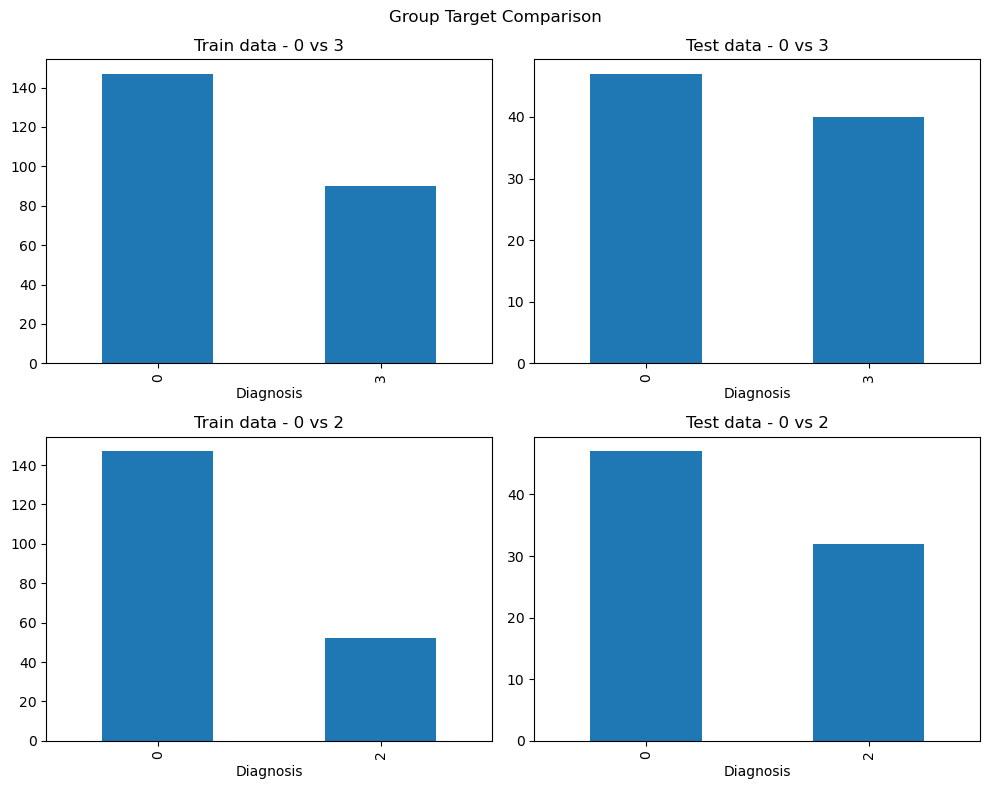

In [75]:
plt.figure(figsize=(10,8))
plt.suptitle("Group Target Comparison")

plt.subplot(2, 2, 1)
x_train_combined_groups_one["Diagnosis"].value_counts().plot(kind='bar')
plt.title("Train data - 0 vs 3")

plt.subplot(2, 2, 2)
x_test_combined_groups_one["Diagnosis"].value_counts().plot(kind='bar')
plt.title("Test data - 0 vs 3")

plt.subplot(2, 2, 3)
x_train_combined_groups_two["Diagnosis"].value_counts().plot(kind='bar')
plt.title("Train data - 0 vs 2")

plt.subplot(2, 2, 4)
x_test_combined_groups_two["Diagnosis"].value_counts().plot(kind='bar')
plt.title("Test data - 0 vs 2")

plt.tight_layout()  
plt.show()

In [83]:
# Print the value counts for each dataset
print("Train data - 0 vs 3 (x_train_combined_groups_one):")
print(x_train_combined_groups_one["Diagnosis"].value_counts())

print("\nTest data - 0 vs 3 (x_test_combined_groups_one):")
print(x_test_combined_groups_one["Diagnosis"].value_counts())

print("\nTrain data - 0 vs 2 (x_train_combined_groups_two):")
print(x_train_combined_groups_two["Diagnosis"].value_counts())

print("\nTest data - 0 vs 2 (x_test_combined_groups_two):")
print(x_test_combined_groups_two["Diagnosis"].value_counts())

Train data - 0 vs 3 (x_train_combined_groups_one):
Diagnosis
0    147
3     90
Name: count, dtype: int64

Test data - 0 vs 3 (x_test_combined_groups_one):
Diagnosis
0    47
3    40
Name: count, dtype: int64

Train data - 0 vs 2 (x_train_combined_groups_two):
Diagnosis
0    147
2     52
Name: count, dtype: int64

Test data - 0 vs 2 (x_test_combined_groups_two):
Diagnosis
0    47
2    32
Name: count, dtype: int64


# Exporting processed dataset

In [59]:
print("Shapes of the datasets")
print(f"-Trained Combined: {trained_combined.shape}")
print(f"-Test Combined: {test_combined.shape}")
print(f"-X_train Combined Group One: {x_train_combined_groups_one.shape}")
print(f"-X_test Combined Group One: {x_test_combined_groups_one.shape}")
print(f"-X_train Combined Group Two: {x_train_combined_groups_two.shape}")
print(f"-X_test Combined Group Two: {x_test_combined_groups_two.shape}")

Shapes of the datasets
-Trained Combined: (425, 21)
-Test Combined: (183, 21)
-X_train Combined Group One: (237, 21)
-X_test Combined Group One: (87, 21)
-X_train Combined Group Two: (199, 21)
-X_test Combined Group Two: (79, 21)


In [62]:
trained_combined.to_csv("C:/Users/steve/Desktop/Notebooks/Thesis-Project/Datasets/processed/all_features/all_groups/train_processed.csv", index=False)
test_combined.to_csv("C:/Users/steve/Desktop/Notebooks/Thesis-Project/Datasets/processed/all_features/all_groups/test_processed.csv", index=False)

x_train_combined_groups_one.to_csv("C:/Users/steve/Desktop/Notebooks/Thesis-Project/Datasets/processed/all_features/group_one/one_train_processed.csv", index=False)
x_test_combined_groups_one.to_csv("C:/Users/steve/Desktop/Notebooks/Thesis-Project/Datasets/processed/all_features/group_one/one_test_processed.csv", index=False)

x_train_combined_groups_two.to_csv("C:/Users/steve/Desktop/Notebooks/Thesis-Project/Datasets/processed/all_features/group_two/two_test_processed.csv", index=False)
x_test_combined_groups_two.to_csv("C:/Users/steve/Desktop/Notebooks/Thesis-Project/Datasets/processed/all_features/group_two/two_train_processed.csv", index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

def run_random_forest(X_train, X_test, y_train, y_test):

        # Initialize the Random Forest with class weight balancing
        rf = RandomForestClassifier(n_estimators=100,
                                    max_depth=5,
                                    random_state=42,
                                    class_weight="balanced",
        )
        
        kf = StratifiedKFold(n_splits=5,
                             shuffle=True,
                             random_state=42,
        )
        
        cross_val_results = cross_validate(rf,
                                           X_train,
                                           y_train,
                                           cv=kf,
                                           scoring=["accuracy", "roc_auc_ovr_weighted"],
                                           return_train_score=True,
        )
        
        # Print mean and std of each metric (for train and test)
        print("Stratified Cross Validation Results")
        print(f'Mean train accuracy:', np.mean(cross_val_results['train_accuracy']), '±', np.std(cross_val_results['train_accuracy']))
        print(f'Mean train ROC-AUC:', np.mean(cross_val_results['train_roc_auc_ovr_weighted']), '±', np.std(cross_val_results['train_roc_auc_ovr_weighted']))
        print(f'Mean test accuracy:', np.mean(cross_val_results['test_accuracy']), '±', np.std(cross_val_results['test_accuracy']))
        print(f'Mean test ROC-AUC:', np.mean(cross_val_results['test_roc_auc_ovr_weighted']), '±', np.std(cross_val_results['test_roc_auc_ovr_weighted']))
        
        # Fit the model
        rf.fit(X_train, y_train)
        
        # Get predicted probabilities for ROC AUC
        pred_train_proba = rf.predict_proba(X_train)
        pred_test_proba = rf.predict_proba(X_test)
        
        # Get predicted accuracy values
        pred_train_norm = rf.predict(X_train)
        pred_test_norm = rf.predict(X_test)
        
        # Calculate ROC-AUC
        roc_score_train = roc_auc_score(y_train, 
                                        pred_train_proba, 
                                        average="weighted", 
                                        multi_class="ovr",
        )
        roc_score_test = roc_auc_score(y_test,
                                    pred_test_proba,  
                                    average="weighted", 
                                    multi_class="ovr",
        )
        
        # Calculate accuracies
        accuracy_train = accuracy_score(y_train, pred_train_norm)
        accuracy_test = accuracy_score(y_test, pred_test_norm)
        
        # Print results
        print("\nFinal Predictions")
        print(f"Train Accuracy: {accuracy_train}")
        print(f"Train ROC-AUC: {roc_score_train}")
        print(f"Test Accuracy: {accuracy_test}")
        print(f"Test ROC-AUC: {roc_score_test}")

In [ ]:
dataframes = [
    (X_train_bayes_t, X_test_bayes_t), 
    (X_train_knn_t, X_test_knn_t),
    (X_train_nonLin_t, X_test_nonLin_t),
    (X_train_missForest_t, X_test_missForest_t),
    (X_train_gradient_t, X_test_gradient_t)
]

imputer_methods = ["Bayes", "KNNReg", "nonLin", "missForest", "gradient"]

for i, ((x_train, x_test), imputer_methods) in enumerate(zip(dataframes, imputer_methods)):
    print(f"Running random forest for dataset pair {i} with method {imputer_methods}: ")
    run_random_forest(x_train, x_test, y_train, y_test)
    print("\n")